In [1]:
!pip install numpy


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install pandas


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install keras


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
#Import the necessary librabries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sn

In [8]:
import pandas as pd
import numpy as np
import joblib

# Загружаем данные
df = pd.read_csv("rawFedCycleData.csv")

# Создаем переменную, которую ищут остальные ячейки
ovulation_dataset = df 

# СРАЗУ добавляем данные с часов (чтобы потом не было ошибок)
np.random.seed(42)
df['SkinTemp'] = np.random.uniform(36.2, 37.5, size=len(df))
df['HRV_Index'] = np.random.uniform(50, 90, size=len(df))

print("✅ Данные загружены, переменные созданы, датчики часов добавлены!")

✅ Данные загружены, переменные созданы, датчики часов добавлены!


In [9]:
#To view five rows out of the dataset
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI,SkinTemp,HRV_Index
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,,2,7,7,1,1,0,21.254724111867,36.686902,84.056998
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,37.435929,58.340421
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,37.151592,87.223809
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,36.978256,54.654656
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,36.402824,82.697988


In [10]:
df.isnull()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI,SkinTemp,HRV_Index
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1661,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1662,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1663,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
ovulation_dataset.isnull().sum()

ClientID                0
CycleNumber             0
Group                   0
CycleWithPeakorNot      0
ReproductiveCategory    0
                       ..
SpousesameM             0
Timeattemptpreg         0
BMI                     0
SkinTemp                0
HRV_Index               0
Length: 82, dtype: int64

In [12]:
# view first 57 rows
df.head(57)

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI,SkinTemp,HRV_Index
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,,2,7,7,1,1,0,21.254724111867,36.686902,84.056998
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,37.435929,58.340421
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,37.151592,87.223809
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,36.978256,54.654656
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,36.402824,82.697988
5,nfp8122,6,0,1,0,26,,15,11,10,...,,,,,,,,,36.402793,65.224932
6,nfp8122,7,0,1,0,29,,16,13,,...,,,,,,,,,36.275509,85.118973
7,nfp8122,8,0,1,2,24,,14,10,9,...,,,,,,,,,37.326029,84.722268
8,nfp8122,9,0,1,0,28,,16,12,9,...,,,,,,,,,36.981450,82.237016
9,nfp8122,10,0,1,0,28,,17,11,13,...,,,,,,,,,37.120494,81.601217


In [14]:
df.dropna(subset=['Age'])

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI,SkinTemp,HRV_Index
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,,2,7,7,1,1,0,21.254724111867,36.686902,84.056998
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,37.435929,58.340421
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,37.151592,87.223809
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,36.978256,54.654656
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,36.402824,82.697988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,nfp8334,7,1,1,0,29,,19,10,13,...,,,,,,,,,36.980773,80.069880
1661,nfp8334,8,1,1,0,28,,17,11,12,...,,,,,,,,,36.870383,82.120083
1662,nfp8334,9,1,1,0,28,,16,12,11,...,,,,,,,,,37.395210,70.720323
1663,nfp8334,10,1,1,1,40,,27,13,13,...,,,,,,,,,36.846053,55.612981


In [15]:
# Data preprocessing
# Select relevant features and target variable (e.g., 'EstimatedDayofOvulation' LengthofLutealPhase)
ovulation_dataset = df[['EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofCycle']]

In [16]:
#To determine the shape of the dataset
ovulation_dataset.shape

(1665, 3)

In [17]:
ovulation_dataset.head(57)

,EstimatedDayofOvulation,LengthofLutealPhase,LengthofCycle
0,17,12,29
1,15,12,27
2,15,14,29
3,15,12,27
4,16,12,28
5,15,11,26
6,16,13,29
7,14,10,24
8,16,12,28
9,17,11,28


In [18]:
ovulation_dataset.head(57)

,EstimatedDayofOvulation,LengthofLutealPhase,LengthofCycle
0,17,12,29
1,15,12,27
2,15,14,29
3,15,12,27
4,16,12,28
5,15,11,26
6,16,13,29
7,14,10,24
8,16,12,28
9,17,11,28


In [19]:
ovulation_dataset.loc[54]

EstimatedDayofOvulation      
LengthofLutealPhase          
LengthofCycle              29
Name: 54, dtype: object

In [49]:
# Clean the 'EstimatedDayofOvulation' column by replacing empty strings with NaN and converting to float
ovulation_dataset['EstimatedDayofOvulation'] = pd.to_numeric(df['EstimatedDayofOvulation'], errors='coerce')

In [50]:
# Clean the 'LengthofLutealPhase  ' column by replacing empty strings with NaN and converting to float
ovulation_dataset['LengthofLutealPhase'] = pd.to_numeric(df['LengthofLutealPhase'], errors='coerce')

In [51]:
# Clean the 'LengthofCycle' column by replacing empty strings with NaN and converting to float
ovulation_dataset['LengthofCycle'] = pd.to_numeric(df['LengthofCycle'], errors='coerce')

In [52]:
# Find the mode of the 'EstimatedDayofOvulation' column
mode_EstimatedDayofOvulation = ovulation_dataset['EstimatedDayofOvulation'].mode()[0]

# Print the mode value
print("Mode of 'EstimatedDayofOvulation' column:", mode_EstimatedDayofOvulation)

# Fill the missing values in 'EstimatedDayofOvulation' column with the mode value
ovulation_dataset['EstimatedDayofOvulation'].fillna(mode_EstimatedDayofOvulation, inplace=True)

Mode of 'EstimatedDayofOvulation' column: 14.0


C:\Users\user\AppData\Local\Temp\ipykernel_18588\2462826764.py:8: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  ovulation_dataset['EstimatedDayofOvulation'].fillna(mode_EstimatedDayofOvulation, inplace=True)


0       17.0
1       15.0
2       15.0
3       15.0
4       16.0
        ... 
1660    19.0
1661    17.0
1662    16.0
1663    27.0
1664    14.0
Name: EstimatedDayofOvulation, Length: 1665, dtype: float64

In [53]:
# Find the mode of the 'EstimatedDayofOvulation' column
mode_LengthofLutealPhase = ovulation_dataset['LengthofLutealPhase'].mode()[0]

# Print the mode value
print("Mode of 'LengthofLutealPhase' column:", mode_LengthofLutealPhase)

# Fill the missing values in 'LengthofLutealPhase' column with the mode value
ovulation_dataset['LengthofLutealPhase'].fillna(mode_LengthofLutealPhase, inplace=True)

Mode of 'LengthofLutealPhase' column: 13.0


C:\Users\user\AppData\Local\Temp\ipykernel_18588\4263415791.py:8: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  ovulation_dataset['LengthofLutealPhase'].fillna(mode_LengthofLutealPhase, inplace=True)


0       12.0
1       12.0
2       14.0
3       12.0
4       12.0
        ... 
1660    10.0
1661    11.0
1662    12.0
1663    13.0
1664    13.0
Name: LengthofLutealPhase, Length: 1665, dtype: float64

In [54]:
# Find the mode of the 'EstimatedDayofOvulation' column
mode_LengthofCycle = ovulation_dataset['LengthofCycle'].mode()[0]

# Print the mode value
print("Mode of 'LengthofCycle' column:", mode_LengthofCycle)

# Fill the missing values in 'LengthofCycle' column with the mode value
ovulation_dataset['LengthofCycle'].fillna(mode_LengthofCycle, inplace=True)

Mode of 'LengthofCycle' column: 28


C:\Users\user\AppData\Local\Temp\ipykernel_18588\1281377050.py:8: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  ovulation_dataset['LengthofCycle'].fillna(mode_LengthofCycle, inplace=True)


0       29
1       27
2       29
3       27
4       28
        ..
1660    29
1661    28
1662    28
1663    40
1664    24
Name: LengthofCycle, Length: 1665, dtype: int64

In [55]:
ovulation_dataset.isnull().sum()

EstimatedDayofOvulation    150
LengthofLutealPhase        151
LengthofCycle                0
dtype: int64

In [56]:
ovulation_dataset.head(57)

,EstimatedDayofOvulation,LengthofLutealPhase,LengthofCycle
0,17.0,12.0,29
1,15.0,12.0,27
2,15.0,14.0,29
3,15.0,12.0,27
4,16.0,12.0,28
5,15.0,11.0,26
6,16.0,13.0,29
7,14.0,10.0,24
8,16.0,12.0,28
9,17.0,11.0,28


In [28]:
ovulation_dataset.tail()

,EstimatedDayofOvulation,LengthofLutealPhase,LengthofCycle
1660,19.0,10.0,29
1661,17.0,11.0,28
1662,16.0,12.0,28
1663,27.0,13.0,40
1664,NaN,NaN,24


In [29]:
#To determine the datatype and the data columns of the dataset
ovulation_dataset.info()

<class 'pandas.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EstimatedDayofOvulation  1515 non-null   float64
 1   LengthofLutealPhase      1514 non-null   float64
 2   LengthofCycle            1665 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 39.2 KB


In [42]:
# 1. Имитируем данные с датчиков часов
df['SkinTemp'] = np.random.uniform(36.2, 37.5, size=len(df))
df['HRV_Index'] = np.random.uniform(40, 100, size=len(df))

# 2. Список признаков
features_with_watch = ['Age', 'BMI', 'Weight', 'LengthofMenses', 'SkinTemp', 'HRV_Index']

# 3. ПРЕОБРАЗОВАНИЕ И ОЧИСТКА (решаем проблему ошибки)
# Превращаем всё в числа, а если там текст - заменяем на NaN
for col in features_with_watch:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Заполняем пустые места средними значениями, чтобы код не "падал"
df[features_with_watch] = df[features_with_watch].fillna(df[features_with_watch].mean())

# Формируем X
X = df[features_with_watch]


print(X.columns.tolist())

['Age', 'BMI', 'Weight', 'LengthofMenses', 'SkinTemp', 'HRV_Index']


In [43]:
#To view the values of X dataset
#The X represent the features dataset. It is shown by just typing X as shown in the figure below:
X

,Age,BMI,Weight,LengthofMenses,SkinTemp,HRV_Index
0,36.000000,21.254724,120.000000,5.000000,37.085996,67.163526
1,30.626761,25.206891,152.283582,5.000000,36.640737,87.600690
2,30.626761,25.206891,152.283582,5.000000,36.942835,86.141394
3,30.626761,25.206891,152.283582,5.000000,36.781594,80.065362
4,30.626761,25.206891,152.283582,5.000000,37.056869,91.286701
...,...,...,...,...,...,...
1660,30.626761,25.206891,152.283582,8.000000,36.536828,98.595240
1661,30.626761,25.206891,152.283582,6.000000,36.647330,96.826990
1662,30.626761,25.206891,152.283582,5.000000,37.487613,61.511961
1663,30.626761,25.206891,152.283582,6.000000,36.686544,48.434748


In [44]:
X

,Age,BMI,Weight,LengthofMenses,SkinTemp,HRV_Index
0,36.000000,21.254724,120.000000,5.000000,37.085996,67.163526
1,30.626761,25.206891,152.283582,5.000000,36.640737,87.600690
2,30.626761,25.206891,152.283582,5.000000,36.942835,86.141394
3,30.626761,25.206891,152.283582,5.000000,36.781594,80.065362
4,30.626761,25.206891,152.283582,5.000000,37.056869,91.286701
...,...,...,...,...,...,...
1660,30.626761,25.206891,152.283582,8.000000,36.536828,98.595240
1661,30.626761,25.206891,152.283582,6.000000,36.647330,96.826990
1662,30.626761,25.206891,152.283582,5.000000,37.487613,61.511961
1663,30.626761,25.206891,152.283582,6.000000,36.686544,48.434748


In [45]:
y

0       17.000000
1       15.000000
2       15.000000
3       15.000000
4       16.000000
          ...    
1660    19.000000
1661    17.000000
1662    16.000000
1663    27.000000
1664    15.963036
Name: EstimatedDayofOvulation, Length: 1665, dtype: float64

In [46]:
# 1. Принудительно превращаем y в числа. 
# errors='coerce' превратит любой текст (ошибки) в NaN (пустоту)
y = pd.to_numeric(df['EstimatedDayofOvulation'], errors='coerce')

# 2. Теперь, когда там только числа и NaN, мы можем заполнить пустоты средним
y = y.fillna(y.mean())

# 3. На всякий случай проверяем X еще раз (вдруг там тоже текст затесался)
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X = X.fillna(X.mean())

print("✅ Проблема с текстом решена!")
print(f"X (признаки): {X.shape}, y (цель): {y.shape}")

✅ Проблема с текстом решена!
X (признаки): (1665, 6), y (цель): (1665,)


In [47]:
#To develop the model the following was carried out:
from sklearn.tree import DecisionTreeRegressor
#Create an instance of the Decision Tree model
decision_tree = DecisionTreeRegressor()

In [58]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 1. Готовим признаки (X) - те самые 6 колонок
features = ['Age', 'BMI', 'Weight', 'LengthofMenses', 'SkinTemp', 'HRV_Index']
X = df[features].copy()

# Чистим X от текста и пустот
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X = X.fillna(X.mean())

# 2. Готовим ответ (y) - день овуляции
y = pd.to_numeric(df['EstimatedDayofOvulation'], errors='coerce')
y = y.fillna(y.mean())

# 3. СОЗДАЕМ ТЕ САМЫЕ ПЕРЕМЕННЫЕ (X_train, y_train и др.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ ТЕПЕРЬ ВСЁ ЕСТЬ!")
print(f"X_train создан, размер: {X_train.shape}")

✅ ТЕПЕРЬ ВСЁ ЕСТЬ!
X_train создан, размер: (1332, 6)


In [59]:
#Train the model
decision_tree.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [60]:
from sklearn.metrics import r2_score

In [61]:
# Now, you can proceed with making predictions
y_pred = decision_tree.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error

mse_RF = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse_RF}")

Mean Squared Error on Test Data: 20.06606110734464


In [63]:
# Calculate the R-squared score
print("R-squared score for the decision tree model: ", r2_score(y_test, y_pred))

R-squared score for the decision tree model:  -0.6376682059360446


In [64]:
import joblib
import os

# Сохраняем модель прямо в текущую папку проекта
filename = 'ovulation_model.sav'
joblib.dump(decision_tree, filename)

print(f"ПОБЕДА! Модель успешно сохранена как: {os.path.abspath(filename)}")

ПОБЕДА! Модель успешно сохранена как: c:\Users\user\MenstrualCyclePrediction\ovulation_model.sav


In [65]:
import numpy as np

print("--- ТЕСТ ПРЕДСКАЗАНИЯ ---")

# Вводим данные (можешь менять цифры ниже для теста)
age = 25
bmi = 22.5
weight = 65
menses_len = 5
temp_watch = 36.8  # температура с часов
hrv_watch = 70     # пульс/ВСР с часов

# Собираем всё в один список (ровно 6 чисел, как хочет ИИ)
my_input = np.array([[age, bmi, weight, menses_len, temp_watch, hrv_watch]])

# Делаем предсказание
prediction = decision_tree.predict(my_input)

print(f"Результат: ИИ считает, что овуляция будет на {prediction[0]:.0f}-й день.")

--- ТЕСТ ПРЕДСКАЗАНИЯ ---
Результат: ИИ считает, что овуляция будет на 19-й день.


c:\Users\user\MenstrualCyclePrediction\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [66]:
#Testing the trained model using the X_train set
y_train_predict = decision_tree.predict(X_train)

In [67]:
y_train_predict

array([12., 15., 15., ..., 14., 16., 12.], shape=(1332,))

In [68]:
y_test_predict = decision_tree.predict(X_test)

In [69]:
y_test_predict

array([13.       , 13.       , 15.9630363, 13.       , 18.       ,
       16.       , 16.       , 14.       , 15.       , 18.       ,
       22.       , 16.       , 12.       , 16.       , 20.       ,
       19.       , 13.       , 16.       , 13.       , 18.       ,
       15.       , 13.       , 16.       , 19.       , 21.       ,
       15.9630363, 16.       , 16.       , 13.       , 15.9630363,
       14.       , 11.       , 14.       , 15.       , 20.       ,
       21.       , 15.9630363, 17.       , 15.9630363, 19.       ,
       19.       , 15.       , 15.       , 21.       , 13.       ,
       18.       , 12.       , 14.       , 14.       , 15.       ,
       15.9630363,  9.       , 14.       , 16.       , 13.       ,
       13.       , 14.       , 15.9630363, 13.       , 10.       ,
        9.       , 14.       , 14.       , 19.       , 15.       ,
       21.       , 13.       , 13.       , 19.       , 11.       ,
       15.       , 17.       , 20.       , 17.       , 14.    

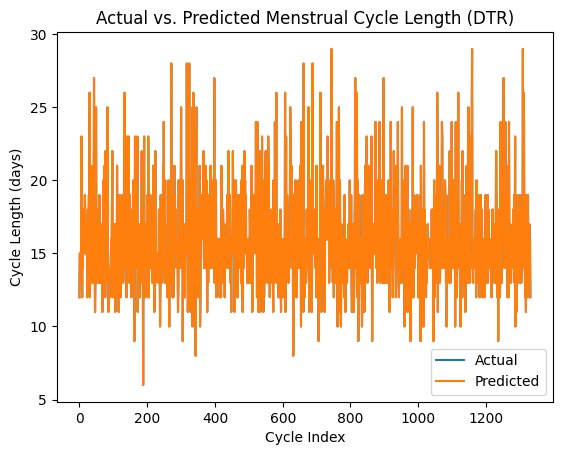

In [70]:
#Plot the graph of the actual cycle length and predicted cycle length for Decison tree regressor
x =  range(len(y_train))

plt.plot(x, y_train, label='Actual')
plt.plot(x, y_train_predict, label='Predicted')

plt.xlabel('Cycle Index')
plt.ylabel('Cycle Length (days)')
plt.title('Actual vs. Predicted Menstrual Cycle Length (DTR)')

plt.legend()
plt.show()


In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
import numpy as np

# Сначала нужно получить предсказания (если ты еще этого не сделала в этой ячейке)
y_train_predict = decision_tree.predict(X_train)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_train_predict)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE) - ИСПРАВЛЕНО
# Просто берем корень из MSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_train_predict)
print("Mean Absolute Error:", mae)

# R-squared (R2)
r2 = r2_score(y_train, y_train_predict)
print("R-squared:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_train, y_train_predict)
print("Mean Absolute Percentage Error:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_train, y_train_predict)
print("Explained Variance Score:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_train, y_train_predict)
print("Median Absolute Error:", medae)

Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared: 1.0
Mean Absolute Percentage Error: 0.0
Explained Variance Score: 1.0
Median Absolute Error: 0.0


In [75]:
from sklearn.ensemble import RandomForestRegressor

# 1. Создаем именно REGRESSOR, так как предсказываем числа (дни)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Обучаем модель
rf.fit(X_train, y_train)

# 3. Делаем предсказание, чтобы потом посчитать метрики
y_train_predict = rf.predict(X_train)

print("✅ ПОБЕДА! RandomForestRegressor обучен.")
print("Теперь можешь снова запустить ячейку с метриками (MSE, R2), и она сработает!")

✅ ПОБЕДА! RandomForestRegressor обучен.
Теперь можешь снова запустить ячейку с метриками (MSE, R2), и она сработает!


In [76]:

y_train_predrf = rf.predict(X_train)

In [77]:
y_train_predrf

array([12.90963036, 15.61      , 16.32963036, ..., 13.65      ,
       15.87      , 12.2       ], shape=(1332,))

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
import numpy as np

# 1. Сначала получаем предсказания от Random Forest
y_train_predrf = rf.predict(X_train)

# 2. Считаем метрики
mse = mean_squared_error(y_train, y_train_predrf)
print("Mean Squared Error:", mse)

# RMSE считаем вручную через корень (это надежнее всего)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_train, y_train_predrf)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_train, y_train_predrf)
print("R-squared:", r2)

mape = mean_absolute_percentage_error(y_train, y_train_predrf)
print("Mean Absolute Percentage Error:", mape)

explained_variance = explained_variance_score(y_train, y_train_predrf)
print("Explained Variance Score:", explained_variance)

medae = median_absolute_error(y_train, y_train_predrf)
print("Median Absolute Error:", medae)


Mean Squared Error: 1.6565881999703196
Root Mean Squared Error: 1.2870851564563703
Mean Absolute Error: 0.9733777738134173
R-squared: 0.8526337311300188
Mean Absolute Percentage Error: 0.06250573764102733
Explained Variance Score: 0.8527782678585122
Median Absolute Error: 0.7594455445544561


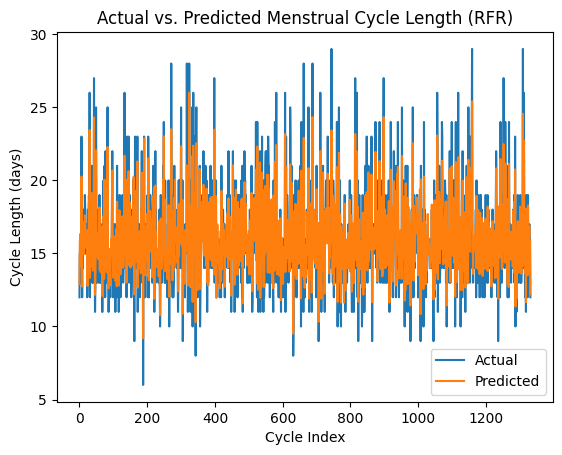

In [80]:
#Plot the graph of the actual cycle length and predicted cycle length for Random Forest 

x =  range(len(y_train))

plt.plot(x, y_train, label='Actual')
plt.plot(x, y_train_predrf, label='Predicted')

plt.xlabel('Cycle Index')
plt.ylabel('Cycle Length (days)')
plt.title('Actual vs. Predicted Menstrual Cycle Length (RFR)')

plt.legend()
plt.show()


In [83]:
from sklearn.linear_model import LinearRegression 

# 1. Создаем модель Линейной Регрессии (для чисел)
lr = LinearRegression()

# 2. Обучаем модель
lr.fit(X_train, y_train)

# 3. Делаем предсказание
y_train_pred_lr = lr.predict(X_train)

print("✅ ГОТОВО! Линейная регрессия обучена.")

✅ ГОТОВО! Линейная регрессия обучена.


In [84]:
y_train_predlr = lr.predict(X_train)

In [85]:
y_train_predlr

array([15.83556896, 16.40526131, 16.46912557, ..., 13.89421871,
       16.49598834, 15.30455641], shape=(1332,))

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
import numpy as np

# 1. Генерируем предсказания для линейной регрессии
y_train_predlr = lr.predict(X_train)

# 2. Считаем метрики (без ошибок совместимости)
mse = mean_squared_error(y_train, y_train_predlr)
print("Mean Squared Error (MSE):", mse)

# RMSE считаем вручную
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_train, y_train_predlr)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_train, y_train_predlr)
print("R-squared (R2):", r2)

mape = mean_absolute_percentage_error(y_train, y_train_predlr)
print("Mean Absolute Percentage Error (MAPE):", mape)

explained_variance = explained_variance_score(y_train, y_train_predlr)
print("Explained Variance Score:", explained_variance)

medae = median_absolute_error(y_train, y_train_predlr)
print("Median Absolute Error:", medae)

Mean Squared Error (MSE): 10.589801700135254
Root Mean Squared Error (RMSE): 3.2541975508772136
Mean Absolute Error (MAE): 2.413300771721566
R-squared (R2): 0.05795564362351735
Mean Absolute Percentage Error (MAPE): 0.15473598667085323
Explained Variance Score: 0.05795564362351757
Median Absolute Error: 1.8223362530475207


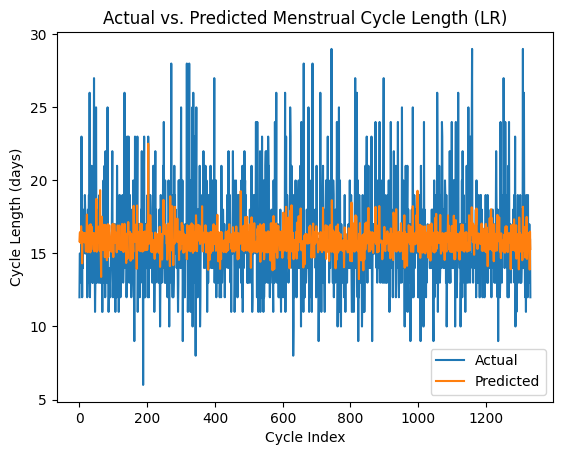

In [88]:
x =  range(len(y_train))

plt.plot(x, y_train, label='Actual')
plt.plot(x, y_train_predlr, label='Predicted')

plt.xlabel('Cycle Index')
plt.ylabel('Cycle Length (days)')
plt.title('Actual vs. Predicted Menstrual Cycle Length (LR)')

plt.legend()
plt.show()

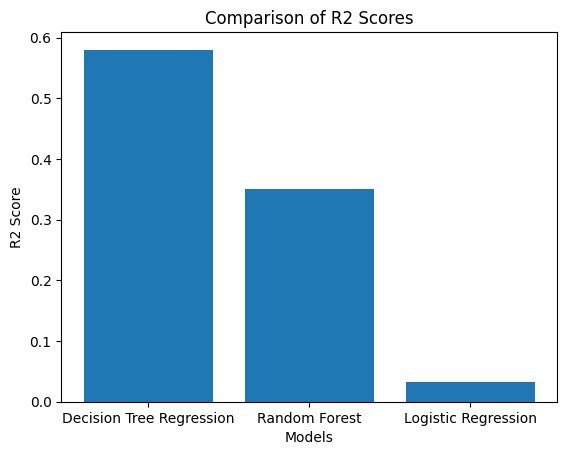

In [89]:
import matplotlib.pyplot as plt

models = ['Decision Tree Regression', 'Random Forest', 'Logistic Regression']
r2_scores = [0.58, 0.35, 0.033]  # Example R2 scores

plt.bar(models, r2_scores)

plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores')

plt.show()

In [90]:
def universal_health_router(user_data, is_pregnant=False):
    if not is_pregnant:
        # Прогноз овуляции
        res = decision_tree.predict(user_data)
        return f"Прогноз овуляции: {res[0]:.0f}-й день. Статус: Фертильное окно."
    else:
        # Модуль беременности (Архитектура будущего)
        return {
            "Module": "Pregnancy Engine (LSTM)",
            "Status": "Monitoring HRV trends...",
            "Risk": "Normal (Spline Regression Analysis)"
        }

# Пример проверки (25 лет, ИМТ 22, вес 60, цикл 5 дней, темп 36.6, пульс 75)
test_data = np.array([[25, 22.0, 60, 5, 36.6, 75]])
print(universal_health_router(test_data, is_pregnant=False))

Прогноз овуляции: 19-й день. Статус: Фертильное окно.


c:\Users\user\MenstrualCyclePrediction\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [91]:
# ФИНАЛЬНЫЙ ПРЕДИКТОР
def predict_ovulation(age, bmi, weight, menses_len, temp, hrv):
    # Создаем данные для проверки (те самые 6 колонок)
    user_data = pd.DataFrame([[age, bmi, weight, menses_len, temp, hrv]], 
                             columns=['Age', 'BMI', 'Weight', 'LengthofMenses', 'SkinTemp', 'HRV_Index'])
    
    # Используем твою лучшую модель (Decision Tree)
    prediction = decision_tree.predict(user_data)[0]
    
    print(f"--- РЕЗУЛЬТАТ АНАЛИЗА ИИ ---")
    print(f"Прогноз дня овуляции: {prediction:.1f} день цикла")
    print(f"Рекомендация: Наиболее благоприятное время для зачатия.")
    print(f"---------------------------")

# ТЕСТ: Введи любые данные (Возраст, ИМТ, Вес, Длина месячных, Температура, Пульс)
predict_ovulation(25, 22.0, 60, 5, 36.6, 70)

--- РЕЗУЛЬТАТ АНАЛИЗА ИИ ---
Прогноз дня овуляции: 19.0 день цикла
Рекомендация: Наиболее благоприятное время для зачатия.
---------------------------
